In [1]:
import numpy as np
import cv2
import PIL 
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import math
%matplotlib inline

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import math
%matplotlib inline

12
perimeters: 12
contour len: 12
draw_cont: 12
listindex: 12
h [[  0.   0.]
 [399.   0.]
 [399. 399.]
 [  0. 399.]]
approx [[ 99.  56.]
 [ 99.  96.]
 [164.  95.]
 [163.  55.]]
h [[  0.   0.]
 [399.   0.]
 [399. 399.]
 [  0. 399.]]
approx [[32. 57.]
 [34. 98.]
 [96. 97.]
 [95. 56.]]
h [[  0.   0.]
 [399.   0.]
 [399. 399.]
 [  0. 399.]]
approx [[100. 101.]
 [101. 142.]
 [163. 142.]
 [163. 100.]]
h [[  0.   0.]
 [399.   0.]
 [399. 399.]
 [  0. 399.]]
approx [[169. 100.]
 [170. 141.]
 [231. 141.]
 [231.  99.]]
h [[  0.   0.]
 [399.   0.]
 [399. 399.]
 [  0. 399.]]
approx [[ 95. 101.]
 [ 33. 101.]
 [ 32. 141.]
 [ 95. 142.]]
h [[  0.   0.]
 [399.   0.]
 [399. 399.]
 [  0. 399.]]
approx [[168.  55.]
 [169.  96.]
 [231.  95.]
 [230.  54.]]
h [[  0.   0.]
 [399.   0.]
 [399. 399.]
 [  0. 399.]]
approx [[101. 147.]
 [102. 188.]
 [164. 187.]
 [164. 146.]]
h [[  0.   0.]
 [399.   0.]
 [399. 399.]
 [  0. 399.]]
approx [[167.  10.]
 [168.  50.]
 [230.  50.]
 [230.   9.]]
h [[  0.   0.]
 [399.   0.

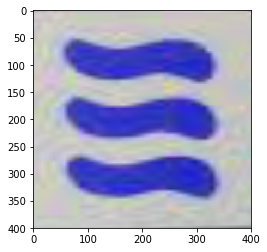

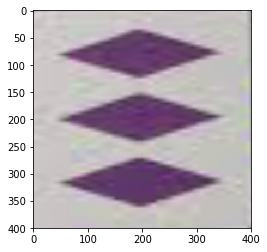

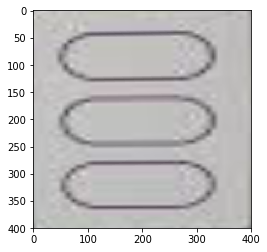

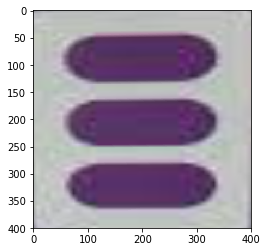

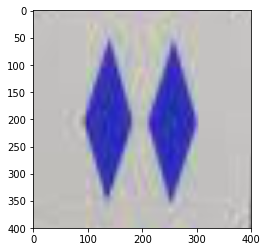

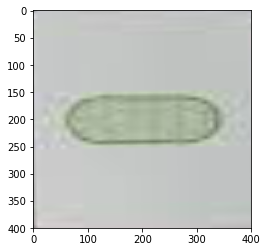

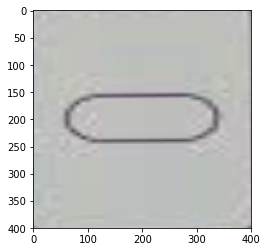

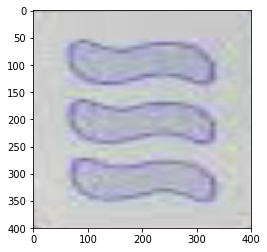

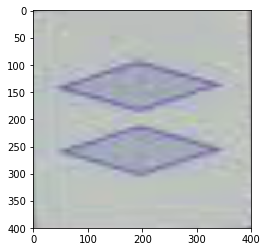

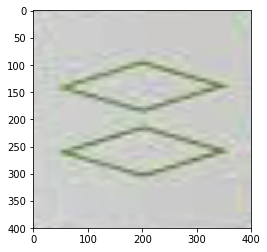

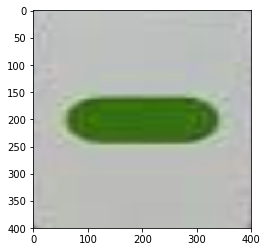

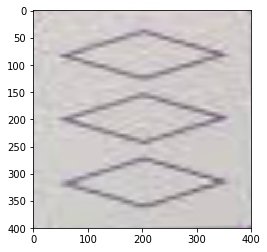

In [13]:

def Imagedetection1(imagepath,numcards,epsilon=0.02):
    img = cv2.imread(imagepath)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(1,1),1000)
    flag, thresh = cv2.threshold(blur, 120, 255, cv2.THRESH_BINARY)
    # Find contours
    image,contours, hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea,reverse=True)[:numcards] 
    print(len(contours))
    # Select long perimeters only
    perimeters = [cv2.arcLength(contours[i],True) for i in range(len(contours))]
    listindex=[i for i in range(numcards) if perimeters[i]>perimeters[0]/2]
    # Show image
    imgcont = img.copy()
    [cv2.drawContours(imgcont, [contours[i]], 0, (255,0,0), 5) for i in listindex]
    draw_cont = [cv2.drawContours(imgcont, [contours[i]], 0, (255,0,0), 5) for i in listindex]
    
    print("perimeters:" , len(perimeters))
    print("contour len:" , len(contours))
    print("draw_cont:" , len(draw_cont))
    print("listindex:" , len(listindex))
    
   
    warp = list(range(numcards))
    
    for i in range(numcards):
        card = contours[i]
        peri = cv2.arcLength(card,True)
        approx = cv2.approxPolyDP(card,epsilon*peri,True)
        rect = cv2.minAreaRect(contours[i])
        r = cv2.boxPoints(rect)

        h = np.float32([[0,0],[399,0],[399,399],[0,399]])
        print('h', h)
        approx = np.float32([item for sublist in approx for item in sublist])
        print('approx', approx)
        transform = cv2.getPerspectiveTransform(approx,h)
#         print('transform', transform)
        warp[i] = cv2.warpPerspective(img,transform,(400,400))
#         print('warp', len(warp[i]))

    # Show perspective correction
    new_img_list = []
    for i in range(numcards):
        new_img = cv2.cvtColor(warp[i],cv2.COLOR_BGR2RGB)
        new_img_list.append(new_img)
        
        cv2.imwrite(f"Image{i}.jpg",warp[i])
#     print(new_img)
    print("Cropping Complete! Let's roll!")
    print(len(new_img_list))
    
    return new_img_list
    
testone = "IMG_1817.JPG"
testtwo = "../Denmo3.jpg"
fail = "IMG_1850.JPG"
nochange ="IMG_1830.JPG"
testthree = "../images.jpg"

new_imgs = Imagedetection1(testthree,12)

for img in new_imgs:
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.figure()
    plt.imshow(img)

In [9]:
def Imagedetection_debug(imagepath,numcards,epsilon=0.02):
    img = cv2.imread(imagepath)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(1,1),1000)
    flag, thresh = cv2.threshold(blur, 120, 255, cv2.THRESH_BINARY)
    
    # Find contours
    image,contours, hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea,reverse=True)[:numcards] 
    print("contour len:" , len(contours))
    
    # Select long perimeters only
    perimeters = [cv2.arcLength(contours[i],True) for i in range(len(contours))]
    print("perimeters:" , len(perimeters))
    
    listindex=[i for i in range(numcards) if perimeters[i]>perimeters[0]/2]
    print("listindex:" , len(listindex))
   
    # Show image
    imgcont = img.copy()
    [cv2.drawContours(imgcont, [contours[i]], 0, (255,0,0), 5) for i in listindex]
    draw_cont = [cv2.drawContours(imgcont, [contours[i]], 0, (255,0,0), 5) for i in listindex]
    print("draw_cont:" , len(draw_cont))
    
    
    warp = list(range(numcards))
    
    for i in range(numcards):
        card = contours[i]
        peri = cv2.arcLength(card,True)
        approx = cv2.approxPolyDP(card,epsilon*peri,True)
        rect = cv2.minAreaRect(contours[i])
        r = cv2.boxPoints(rect)

        h = np.float32([[0,0],[399,0],[399,399],[0,399]])
        approx = np.float32([item for sublist in approx for item in sublist])
        print(approx.shape)
        transform = cv2.getPerspectiveTransform(approx,h)
        warp[i] = cv2.warpPerspective(img,transform,(400,400))

    # Show perspective correction
    new_img_list = []
    for i in range(numcards):
        new_img = cv2.cvtColor(warp[i],cv2.COLOR_BGR2RGB)
        new_img_list.append(new_img)
        
        cv2.imwrite(f"Image{i}.jpg",warp[i])
    print(new_img)
    print("Cropping Complete! Let's roll!")
    print(len(new_img_list))

In [14]:
Imagedetection1(testone,12)

12
perimeters: 12
contour len: 12
draw_cont: 12
listindex: 12
Cropping Complete! Let's roll!
12


[array([[[148, 140, 121],
         [170, 159, 140],
         [165, 153, 132],
         ...,
         [126, 116, 106],
         [130, 120, 110],
         [131, 121, 111]],
 
        [[170, 159, 141],
         [167, 156, 136],
         [166, 154, 132],
         ...,
         [128, 116, 107],
         [139, 128, 118],
         [141, 131, 121]],
 
        [[155, 144, 125],
         [166, 155, 135],
         [168, 156, 134],
         ...,
         [138, 125, 116],
         [145, 132, 123],
         [142, 129, 120]],
 
        ...,
 
        [[180, 171, 153],
         [183, 175, 156],
         [183, 175, 156],
         ...,
         [185, 175, 163],
         [179, 169, 159],
         [168, 158, 149]],
 
        [[166, 157, 140],
         [178, 169, 152],
         [177, 168, 151],
         ...,
         [184, 174, 162],
         [177, 167, 157],
         [148, 138, 129]],
 
        [[142, 133, 116],
         [159, 150, 133],
         [161, 152, 135],
         ...,
         [183, 173, 163],
  